Testing set up of Pygimli

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pygimli as pg
from pygimli.viewer.mpl import drawMesh, drawModel

In [2]:
def create_mesh_and_data(n):
    nc = np.linspace(-2.0, 0.0, n)
    mesh = pg.meshtools.createMesh2D(nc, nc)
    mcx = pg.x(mesh.cellCenter())
    mcy = pg.y(mesh.cellCenter())
    data = np.cos(1.5 * mcx) * np.sin(1.5 * mcy)
    return mesh, data

coarse, coarse_data = create_mesh_and_data(5)
fine, fine_data = create_mesh_and_data(20)

In [3]:
def nearest_neighbor_interpolation(inmesh, indata, outmesh, nan=99.9):
    """ Nearest neighbor interpolation. """
    outdata = []
    for pos in outmesh.cellCenters():
        cell = inmesh.findCell(pos)
        if cell:
            outdata.append(indata[cell.id()])
        else:
            outdata.append(nan)
    return outdata


def linear_interpolation(inmesh, indata, outmesh):
    """ Linear interpolation using `pg.interpolate()` """
    outdata = pg.Vector()  # empty
    pg.interpolate(srcMesh=inmesh, inVec=indata,
                   destPos=outmesh.cellCenters(), outVec=outdata)

    # alternatively you can use the interpolation matrix
    outdata = inmesh.interpolationMatrix(outmesh.cellCenters()) * \
              pg.core.cellDataToPointData(inmesh, indata)
    return outdata

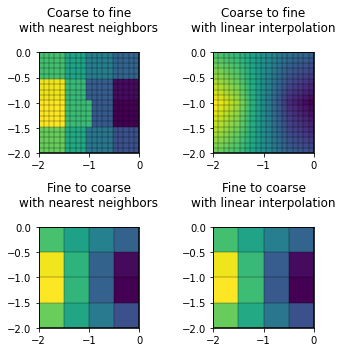

In [4]:
meshes = [coarse, fine]
datasets = [coarse_data, fine_data]
ints = [nearest_neighbor_interpolation,
        linear_interpolation]

fig, ax = plt.subplots(2, 2, figsize=(5, 5))

# Coarse data to fine mesh
drawModel(ax[0, 0], fine, ints[0](coarse, coarse_data, fine), showCbar=False)
drawMesh(ax[0, 0], fine)
drawModel(ax[0, 1], fine, ints[1](coarse, coarse_data, fine), showCbar=False)
drawMesh(ax[0, 1], fine)

# Fine data to coarse mesh
drawModel(ax[1, 0], coarse, ints[0](fine, fine_data, coarse), showCbar=False)
drawMesh(ax[1, 0], coarse)
drawModel(ax[1, 1], coarse, ints[1](fine, fine_data, coarse), showCbar=False)
drawMesh(ax[1, 1], coarse)

titles = ["Coarse to fine\nwith nearest neighbors",
          "Coarse to fine\nwith linear interpolation",
          "Fine to coarse\nwith nearest neighbors",
          "Fine to coarse\nwith linear interpolation"]

for a, title in zip(ax.flat, titles):
    a.set_title(title + "\n")

fig.tight_layout()
plt.show()

In [5]:
from pygimli.meshtools import polytools as plc
from pygimli.meshtools import quality

16/02/22 - 08:39:48 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 
16/02/22 - 08:39:49 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 
16/02/22 - 08:39:49 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 


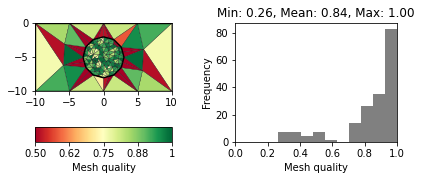

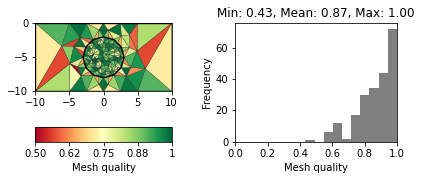

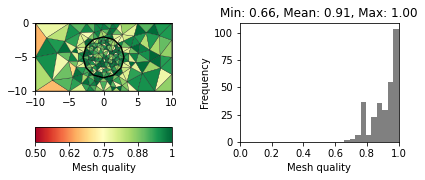

In [6]:
world = plc.createWorld(start=[-10, 0], end=[10, -10], marker=1,
                        worldMarker=False)
c1 = plc.createCircle(pos=[0.0, -5.0], radius=3.0, area=.3)

def showQuality(mesh, qualities):
    fig, axes = plt.subplots(1, 2)
    axes[1].hist(qualities, color="grey")
    pg.show(mesh, qualities, ax=axes[0], cMin=0.5, cMax=1, hold=True,
            logScale=False, label="Mesh quality", cmap="RdYlGn", showMesh=True)
    s = "Min: %.2f, Mean: %.2f, Max: %.2f" % (
        np.min(qualities), np.mean(qualities), np.max(qualities))
    axes[1].set_title(s)
    axes[1].set_xlabel("Mesh quality")
    axes[1].set_ylabel("Frequency")
    axes[1].set_xlim(0, 1)

    # Figure resizing according to mesh dimesions
    x = mesh.xmax() - mesh.xmin()
    y = mesh.ymax() - mesh.ymin()
    width, height = fig.get_size_inches()
    fig.set_figheight(height * 1.3 * (y / x))
    fig.tight_layout()


for q in 10, 20, 30:
    m = pg.meshtools.createMesh([world, c1], quality=q)
    showQuality(m, quality(m))

16/02/22 - 08:39:51 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 
16/02/22 - 08:39:52 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 
16/02/22 - 08:39:52 - pyGIMLi - WARNING - Keyword argument changed from 'cmap' to 'cMap' and will be removed in v 


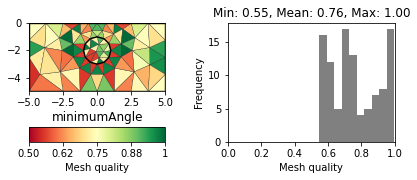

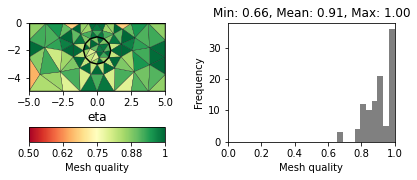

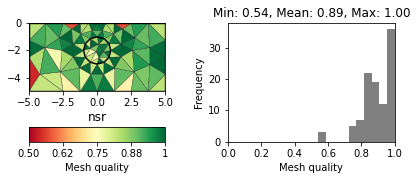

In [7]:
world = plc.createWorld(start=[-5, 0], end=[5, -5], marker=1,
                        worldMarker=False, area=2.)
c1 = plc.createCircle(pos=[0.0, -2.0], radius=1.0, area=.3)
mesh = pg.meshtools.createMesh([world, c1])

for measure in "minimumAngle", "eta", "nsr":
    showQuality(mesh, quality(mesh, measure))
    plt.title(measure)

plt.show()

In [8]:
import pygimli.meshtools as mt

(<AxesSubplot:>, None)

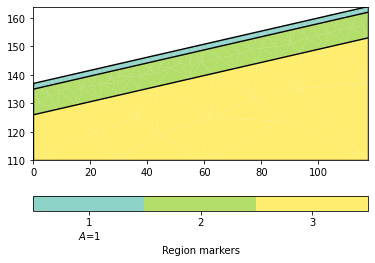

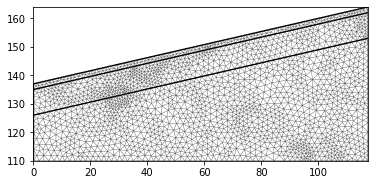

In [9]:
layer1 = mt.createPolygon([[0.0, 137], [117.5, 164], [117.5, 162], [0.0, 135]],
                          isClosed=True, marker=1, area=1)
layer2 = mt.createPolygon([[0.0, 126], [0.0, 135], [117.5, 162], [117.5, 153]],
                          isClosed=True, marker=2)
layer3 = mt.createPolygon([[0.0, 110], [0.0, 126], [117.5, 153], [117.5, 110]],
                          isClosed=True, marker=3)

slope = (164 - 137) / 117.5

geom = layer1 + layer2 + layer3

# If you want no sloped flat earth geometry .. comment out the next 2 lines
# geom = mt.createWorld(start=[0.0, 110], end=[117.5, 137], layers=[137-2, 137-11])
# slope = 0.0

pg.show(geom)

mesh = mt.createMesh(geom, quality=34.3, area=3, smooth=[1, 10])
pg.show(mesh)

(<AxesSubplot:>, None)

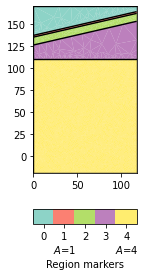

In [10]:
layer0 = mt.createPolygon([[0.0, 170], [117.5, 170], [117.5, 162], [0.0, 135]],
                          isClosed=True, marker=0, area=0)
layer1 = mt.createPolygon([[0.0, 137], [117.5, 164], [117.5, 162], [0.0, 135]],
                          isClosed=True, marker=1, area=1)
layer2 = mt.createPolygon([[0.0, 126], [0.0, 135], [117.5, 162], [117.5, 153]],
                          isClosed=True, marker=2)
layer3 = mt.createPolygon([[0.0, 110], [0.0, 126], [117.5, 153], [117.5, 110]],
                          isClosed=True, marker=3)
layer4 = mt.createPolygon([[0.0,-20],[117.5,-20],[117.5,110],[0.0,110]],
                            isClosed=True, marker=4, area=4)

slope = (164 - 137) / 117.5

geom = layer0 + layer1 + layer2 + layer3 + layer4

# If you want no sloped flat earth geometry .. comment out the next 2 lines
# geom = mt.createWorld(start=[0.0, 110], end=[117.5, 137], layers=[137-2, 137-11])
# slope = 0.0

pg.show(geom)

(<AxesSubplot:>, None)

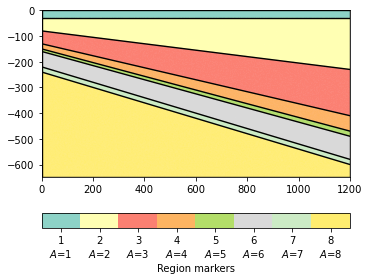

In [11]:
west_edge = 0
east_edge = 1200

topo_w = 0
topo_e = 0

glac_base_w = topo_w - 30
glac_base_e = topo_e - 30

sher_base_w = glac_base_w - 50
sher_base_e = glac_base_e - 200

# u_perm_thickness = 
uperm_base_w = sher_base_w - 50
uperm_base_e = sher_base_e - 180
umag_base_w = uperm_base_w - 20
umag_base_e = uperm_base_e - 60
m_perm_base_w = umag_base_w - 10
m_perm_base_e = umag_base_e - 20
l_perm_base_w = m_perm_base_w - 60
l_perm_base_e = m_perm_base_e - 90
basal_perm_sands_base_w = l_perm_base_w - 20
basal_perm_sands_base_e = l_perm_base_e - 20
base_model = basal_perm_sands_base_e - 50


glac = mt.createPolygon([[west_edge,topo_w],[west_edge,glac_base_w],[east_edge,glac_base_e],[east_edge,topo_e]],
                        isClosed=True, marker=1, area=1)
sher = mt.createPolygon([[west_edge,glac_base_w],[west_edge,sher_base_w],[east_edge,sher_base_e],[east_edge,glac_base_e]],
                        isClosed=True, marker=2, area=2)
uperm = mt.createPolygon([[west_edge,sher_base_w],[west_edge,uperm_base_w],[east_edge,uperm_base_e],[east_edge,sher_base_e]],
                        isClosed=True, marker=3, area=3)
umag = mt.createPolygon([[west_edge,uperm_base_w],[west_edge,umag_base_w],[east_edge,umag_base_e],[east_edge,uperm_base_e]],
                        isClosed=True, marker=4, area=4)
m_perm = mt.createPolygon([[west_edge,umag_base_w],[west_edge,m_perm_base_w],[east_edge,m_perm_base_e],[east_edge,umag_base_e]],
                        isClosed=True, marker=5, area=5)
l_perm = mt.createPolygon([[west_edge,m_perm_base_w],[west_edge,l_perm_base_w],[east_edge,l_perm_base_e],[east_edge,m_perm_base_e]],
                        isClosed=True, marker=6, area=6)
basal_perm = mt.createPolygon([[west_edge,l_perm_base_w],[west_edge,basal_perm_sands_base_w],[east_edge,basal_perm_sands_base_e],[east_edge,l_perm_base_e]],
                        isClosed=True, marker=7, area=7)
base_model = mt.createPolygon([[west_edge,basal_perm_sands_base_w],[west_edge,base_model],[east_edge,base_model],[east_edge,basal_perm_sands_base_e]],
                        isClosed=True, marker=8, area=8)



geom = glac + sher + uperm + umag + m_perm + l_perm + basal_perm + base_model

pg.show(geom, boundaryMarker=True)

(<AxesSubplot:>, None)

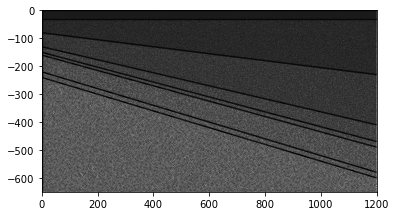

In [12]:
mesh = mt.createMesh(geom, quality=20, area=200, smooth=[1, 5])
pg.show(mesh)

Mesh:  Mesh: Nodes: 176298 Cells: 351115 Boundaries: 527412
Assembling time:  9.643
Solving time:  12.379


(<AxesSubplot:>, None)

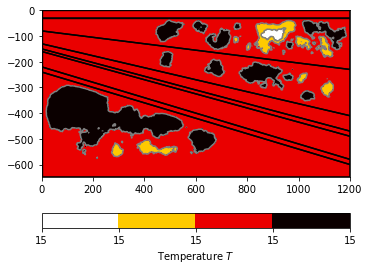

In [18]:
# Boundary Conditions

# dirichlet - specifies the value of a function
dirichletBC = {1: 15.0,         # top
               2: 45.0}      # bottom

# neumann - specifies the normal derivative of a function

neumannBC = {3: -0.03,  # left
             4: -0.03}  # right


T = pg.solver.solveFiniteElements(mesh,
                                  a={1: 1.0,
                                        2: 2.0,
                                        3: 3.0,
                                        4: 5.1,
                                        5: 5.1,
                                        6: 5.1,
                                        7: 5.1,
                                        8: 5.1
                                        },
                                  bc={'Dirichlet': dirichletBC, 'Neumann': neumannBC}, verbose=True)

ax, _ = pg.show(mesh, data=T, label='Temperature $T$', cMap="hot_r")
pg.show(geom, ax=ax, fillRegion=False)

Mesh:  Mesh: Nodes: 3011 Cells: 5832 Boundaries: 8842
Assembling time:  0.064
Solving time:  0.15


(<AxesSubplot:>, None)

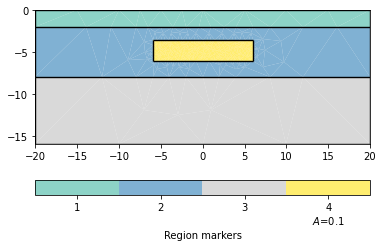

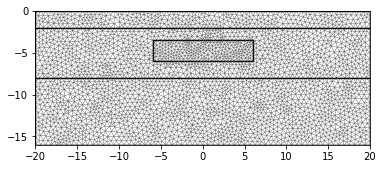

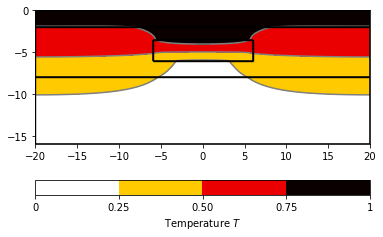

In [ ]:
world = mt.createWorld(start=[-20, 0], end=[20, -16], layers=[-2, -8],
                       worldMarker=False)
# Create a heterogeneous block
block = mt.createRectangle(start=[-6, -3.5], end=[6, -6.0],
                           marker=4,  boundaryMarker=10, area=0.1)
# Merge geometrical entities
geom = world + block
pg.show(geom, boundaryMarker=True)

mesh = mt.createMesh(geom, quality=33, area=0.2, smooth=[1, 10])
pg.show(mesh)

T = pg.solver.solveFiniteElements(mesh,
                                  a={1: 1.0, 2: 2.0, 3: 3.0, 4:0.1},
                                  bc={'Dirichlet': {8: 1.0, 4: 0.0}}, verbose=True)

ax, _ = pg.show(mesh, data=T, label='Temperature $T$', cMap="hot_r")
pg.show(geom, ax=ax, fillRegion=False)
